<a href="https://colab.research.google.com/github/Sompote/COV_pile/blob/main/PileLSTM_26AUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/pile_new.csv')

#ks = pd.concat([df, df2,df3]).reset_index(drop=True)

ks=pd.DataFrame()
#ks=df.iloc[::100, :].reset_index(drop=True)
#ks=ks.drop([0])
ks=df
ks[0:30]

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay
0,0.00,0.000,1.5,1.5,43.0,64,16,53,12,16
1,163.31,-0.561,1.5,1.5,43.0,64,16,53,12,16
2,442.32,-1.656,1.5,1.5,43.0,64,16,53,12,16
3,609.73,-2.081,1.5,1.5,43.0,64,16,53,12,16
4,803.83,-2.964,1.5,1.5,43.0,64,16,53,12,16
5,1005.24,-5.243,1.5,1.5,43.0,64,16,53,12,16
6,1177.52,-6.598,1.5,1.5,43.0,64,16,53,12,16
7,1366.80,-8.879,1.5,1.5,43.0,64,16,53,12,16
8,1556.06,-10.463,1.5,1.5,43.0,64,16,53,12,16
9,1556.15,-14.654,1.5,1.5,43.0,64,16,53,12,16


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


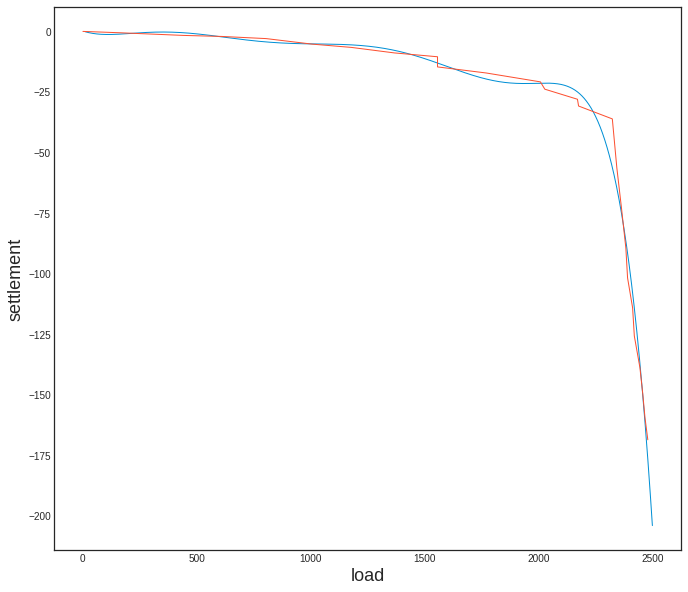

In [ ]:
#polyfit()
from numpy.polynomial import Polynomial
plt.style.use('seaborn-white')
x=ks.loc[0:25,'Load (ton)']
y=ks.loc[0:25,'Settlement(mm.)']
p10=Polynomial.fit(x, y, 8)
plt.figure(figsize=(10,10))
xi=np.arange(10,2500)
zi=p10(xi)
plt.plot(xi,zi,linewidth=1)
plt.plot(x,y,linewidth=1)
plt.xlabel('load', fontsize=18)
plt.ylabel('settlement', fontsize=18)
plt.show()


In [ ]:
p30(163)

-0.4202340537775626

In [ ]:
X = ks.copy()
y = X.pop("Settlement(mm.)")
X=X.dropna()
y=y.dropna()


# Label encoding for categoricals
#for colname in X.select_dtypes("object"):
  #  X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

Load (ton)     1.219476
Stiff clay     0.000000
Medium clay    0.000000
Nave           0.000000
start SS       0.000000
Nbase          0.000000
length         0.000000
W-pile         0.000000
 H-pile        0.000000
Name: MI Scores, dtype: float64

Text(0.5, 1.0, 'H-pile')

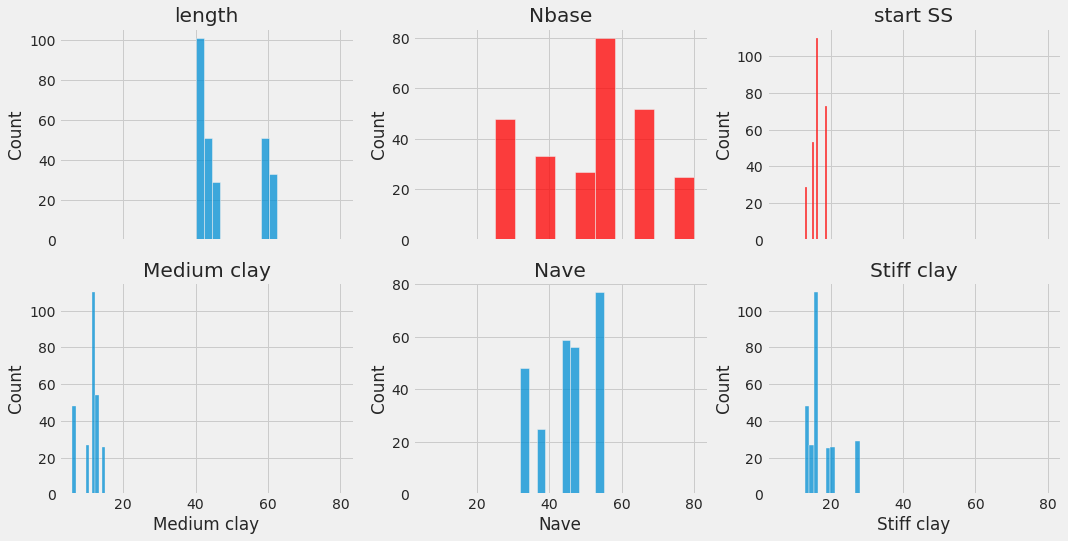

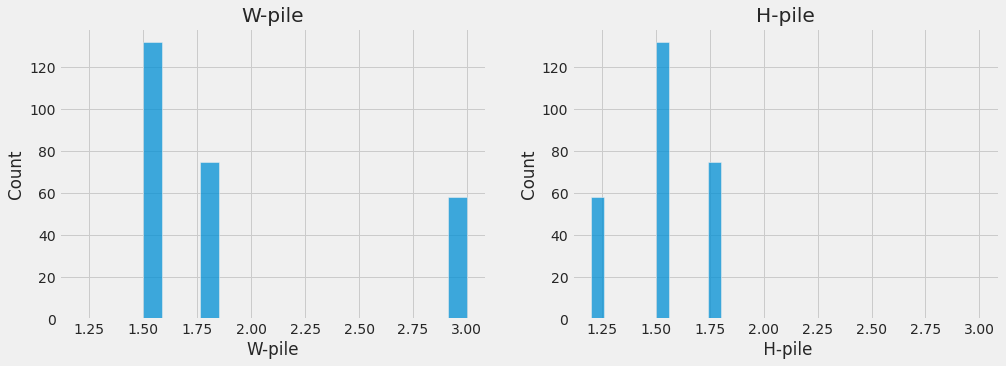

In [ ]:
import seaborn as sns
from seaborn import histplot
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
sns.histplot(ax=axes[0,0],data=ks, x="length")
axes[0,0].set_title('length')

sns.histplot(ax=axes[0,1],data=ks, x="Nbase", color='red')
axes[0,1].set_title('Nbase')

sns.histplot(ax=axes[0,2],data=ks, x="start SS", color='red')
axes[0,2].set_title('start SS')

sns.histplot(ax=axes[1,0],data=ks, x="Medium clay")
axes[1,0].set_title('Medium clay')

sns.histplot(ax=axes[1,1],data=ks, x="Nave")
axes[1,1].set_title('Nave')

sns.histplot(ax=axes[1,2],data=ks, x="Stiff clay")
axes[1,2].set_title('Stiff clay')

fig1, axes2 = plt.subplots(1, 2, sharex=True, figsize=(15,5))

sns.histplot(ax=axes2[0],data=ks, x="W-pile")
axes2[0].set_title('W-pile')

sns.histplot(ax=axes2[1],data=ks, x="\xa0H-pile")
axes2[1].set_title('H-pile')



In [ ]:
ks['\xa0H-pile']

0      1.5
1      1.5
2      1.5
3      1.5
4      1.5
      ... 
251    1.8
252    1.8
253    1.8
254    1.8
255    1.8
Name:  H-pile, Length: 256, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ks.shape

(59, 7)

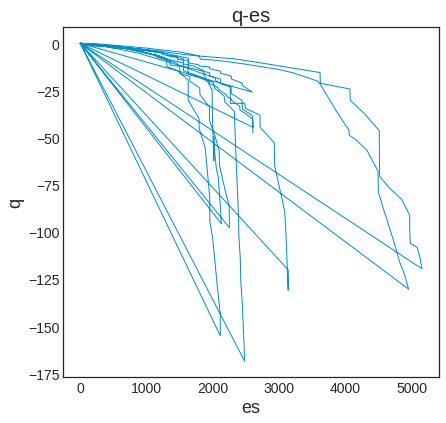

In [ ]:
#plotdata
plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['Load (ton)'],df['Settlement(mm.)'],linewidth=1)
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def setup_data(ks,time_step):
  #setup train data
  #delta strain
#load driver
  ks['load_n']=ks.iloc[time_step:,0].reset_index(drop=True)
  ks['deform_n']=ks.iloc[time_step:,1].reset_index(drop=True)
  mask=[]
  for i in range(ks.shape[0]-1):
    if (ks.iloc[i,0]==0):
      if(i-2>0):
        mask.extend([i-1,i-2])
  ks = ks.drop(labels=mask, axis=0).reset_index(drop=True)

  #ks.drop(ks[ks['load_n'] == 0].index, inplace = True)


  xi=ks.drop(['deform_n'], axis=1)
  #yi=ks[['qn']].copy()
  yi=ks[['deform_n']].copy()
  xi=xi.dropna()
  yi=yi.dropna()

  x_train1=xi.to_numpy()
  y_train1=yi.to_numpy()
  return x_train1, y_train1,xi

  #x_train1=x_train1[:y_train1.shape[0],:]

def scaler(xtrain1,y_train1):
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y


time_step= 4
x_train1, y_train1,xi=setup_data(ks,time_step)
x_train1,y_train1,scaler_x, scaler_y=scaler(x_train1,y_train1)

In [ ]:
x_train1

array([[-1.        ,  1.        ,  0.        , ...,  0.33333333,
        -0.6       , -0.68790391],
       [-0.93569991,  0.99249393,  0.        , ...,  0.33333333,
        -0.6       , -0.6097042 ],
       [-0.82584524,  0.97784304,  0.        , ...,  0.33333333,
        -0.6       , -0.54281455],
       ...,
       [-0.04021167,  0.59538129,  1.        , ...,  0.33333333,
        -0.6       ,  0.00664121],
       [-0.03913679,  0.5645007 ,  1.        , ...,  0.33333333,
        -0.6       ,  0.00968518],
       [-0.03662085,  0.53363349,  1.        , ...,  0.33333333,
        -0.6       ,  0.0099259 ]])

In [ ]:
x_train1[:,3]

array([-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
  

In [ ]:
def time_step_data(dataset,timestep):
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  #output data predict
  datab=timestep
  x_train_time=dataset
  train_data_ini=dataset
  train_data=dataset
  #Create a new dataframe with only the 'Close column
  #scaler = MinMaxScaler(feature_range=(-1,1))
  #train_data = scaler.fit_transform(train_data_ini)
  x_train = []
  x_train_final=np.array([])

  data_length=train_data.shape[0]
  x_train = []
  train_data=x_train_time[:,0]
  for i in range(datab, data_length+1):
    x_train.append(train_data[i-datab:i])
  x_train_a = np.array(x_train)
  x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1],1))
  x_train_final=x_train_a


  for a in range(1,x_train_time.shape[1]):
    x_train = []
    train_data=x_train_time[:,a]
    for i in range(datab, data_length+1):
      x_train.append(train_data[i-datab:i])
    x_train_a = np.array(x_train)
    x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1]))
    x_train_final=np.dstack((x_train_final,x_train_a))
  return x_train_final 

data_x=time_step_data(x_train1,time_step)

In [ ]:
data_x.shape

(208, 2, 11)

In [ ]:
y_train1.shape

(209, 1)

In [ ]:
def split_data(y_train1, data_x,test_split):
  #weight and scale
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  scaler2 = MinMaxScaler(feature_range=(-1,1))
  #scaler=StandardScaler()
  #scaler2=StandardScaler()
  #scaled_data2 = scaler2.fit_transform(y_train1)
  scaled_data2=y_train1
  y=scaled_data2
  x=data_x[:y_train1.shape[0],:]
  y=y[:x.shape[0],:]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split,shuffle=False)
  #x_train= np.reshape(x_trainn, (x_trainn.shape[0], 1,x_trainn.shape[1]))
  #x_test= np.reshape(x_test, (x_test.shape[0], 1,x_test.shape[1]))
  return  x_train, x_test, y_train, y_test
test_split=0.0001
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)

In [ ]:
x_train[55, :,:]

array([[ 0.90747337, -0.47462276,  1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  0.91369783],
       [ 0.99502171, -1.        ,  1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  0.91847319]])

In [ ]:
#no_split scaler
def split_data(y_train1, data_x,test_split):
  #weight and scale
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  scaler2 = MinMaxScaler(feature_range=(-1,1))
  #scaler=StandardScaler()
  #scaler2=StandardScaler()
  #scaled_data2 = scaler2.fit_transform(y_train1)
  scaled_data2=y_train1
  y=scaled_data2
  x=data_x[:y_train1.shape[0],:]
  y=y[:x.shape[0],:]
  #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split,shuffle=False)
  #x_train= np.reshape(x_trainn, (x_trainn.shape[0], 1,x_trainn.shape[1]))
  #x_test= np.reshape(x_test, (x_test.shape[0], 1,x_test.shape[1]))
  return  x, y
test_split=0.0001
x, y=split_data(y_train1, data_x,test_split)

In [ ]:
x.shape

(240, 4, 11)

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.models import Sequential
from keras.layers import Activation, Dense,Flatten,LSTM,Dropout, GRU
kfold=KFold(10,False)
cvscores = []

#x=np.array(x)
#y=np.array(y)

for train, test in kfold.split(x,y):
    x_train, x_test, y_train, y_test = x[train],x[test],y[train],y[test]
    #x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)
    #X_train = np.reshape(X_train, (X_train.shape[0], 1, 8))
    #X_test = np.reshape(X_test, (X_test.shape[0], 1, 8))

    
    #Build the LSTM model
    model = Sequential()
    model.add(LSTM(200, activation="relu",return_sequences=True, use_bias=True,input_shape= (x_train.shape[1],x_train.shape[2])))
    model.add(LSTM(200, return_sequences= False))
    model.add(Flatten())
    model.add(Dense(200))
    model.add(Dropout(0.3))
    model.add(Dense(200))





    model.add(Dense(y_train.shape[1]))
    # Compile the model
    model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])

    #Train the model
    history=model.fit(x_train, y_train, batch_size=3,validation_data=(x_test, y_test), verbose=0,epochs=200)

    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
    cvscores.append(scores[1])
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

mape: 71.33%
mape: 1.73%
mape: 40.59%
mape: 16.87%
mape: 175.23%
mape: 40.67%
mape: 67.19%
mape: 54.38%
mape: 4.17%
mape: 11.02%
48.32% (+/- 48.63%)


In [ ]:
x_train.shape

(197, 1, 11)

Epoch 1/200
66/66 [==============================] - 4s 16ms/step - loss: 0.1610 - mape: 113.1054 - val_loss: 0.0350 - val_mape: 26.2538
Epoch 2/200
66/66 [==============================] - 0s 7ms/step - loss: 0.0182 - mape: 26.7954 - val_loss: 0.0194 - val_mape: 18.9733
Epoch 3/200
66/66 [==============================] - 0s 7ms/step - loss: 0.0041 - mape: 20.6763 - val_loss: 0.0065 - val_mape: 11.3983
Epoch 4/200
66/66 [==============================] - 1s 8ms/step - loss: 0.0026 - mape: 13.5930 - val_loss: 0.0014 - val_mape: 4.8893
Epoch 5/200
66/66 [==============================] - 1s 8ms/step - loss: 0.0021 - mape: 14.3793 - val_loss: 0.0022 - val_mape: 6.2764
Epoch 6/200
66/66 [==============================] - 0s 7ms/step - loss: 0.0025 - mape: 14.1027 - val_loss: 0.0015 - val_mape: 4.8086
Epoch 7/200
66/66 [==============================] - 0s 7ms/step - loss: 0.0028 - mape: 13.9577 - val_loss: 0.0056 - val_mape: 10.4915
Epoch 8/200
66/66 [==============================] - 0s 

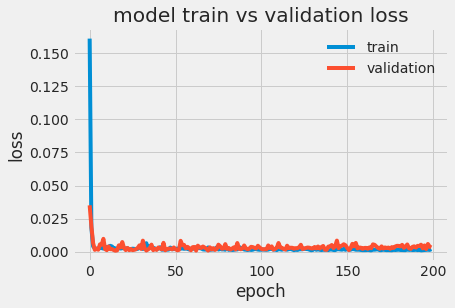

In [ ]:
#train model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Flatten
from matplotlib import pyplot as plt
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

#Build the LSTM model
model = Sequential()
model.add(LSTM(200, activation="relu",return_sequences=True, use_bias=True,input_shape= (x_train.shape[1],x_train.shape[2])))
model.add(LSTM(100, return_sequences= False))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100))





model.add(Dense(y_train.shape[1]))
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])

#Train the model
history=model.fit(x_train, y_train, batch_size=3,validation_data=(x_test, y_test), verbose=1,epochs=200)

# plot train and validation loss
#plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.save('strain.h5')

In [ ]:
#scaler_y.inverse_transform(history.history['loss'])
arr = np.array(history.history['mape']).reshape(1,-1)
arr


array([[113.10539246,  26.79541969,  20.67633057,  13.5930233 ,
         14.37932301,  14.10271645,  13.95765495,  14.8591423 ,
         13.51515388,  14.90895271,  10.26788235,  13.37481785,
         21.46723366,  13.88153076,  13.78537178,  12.50668716,
         15.31105328,  15.99431133,  13.11485004,  14.41804028,
         16.420187  ,  12.15437603,  13.1008215 ,  11.88474846,
         11.47999573,  12.20029736,  13.41261101,  11.81323719,
         16.7437706 ,  18.73060417,  18.90551567,  14.48293877,
         16.3320694 ,  22.8131237 ,  10.5230484 ,  17.19521713,
         17.89421844,  12.84362602,  12.43201256,   9.45919895,
         14.2443943 ,  14.56404209,  10.25396729,  10.20944881,
         11.75941277,  11.93156528,  13.17115879,  16.34845352,
         13.09838009,  12.60449123,  12.6634388 ,  12.1821661 ,
         13.12009335,  14.40511227,  13.43493938,  13.22124004,
         12.30914307,  12.50445652,  12.03687   ,  12.64890862,
         16.02243996,  13.55113029,  17.

In [ ]:
scaler_y.data_range_

array([168.398])

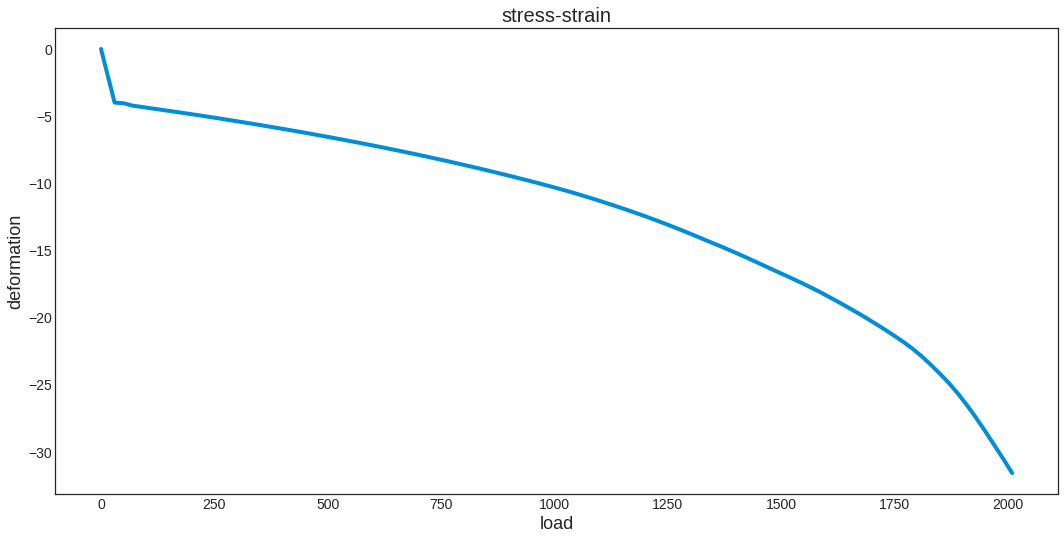

In [ ]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
time_step=2
output=pd.DataFrame()
predict_step=100
n_features=11
load_increment=20
strain=0
ks=df

ini1=np.array([10,-0.02,1.2,1.2,43.6,70,16,50,12,16,20]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,-0.03,1.2,1.2,43.6,70,16,50,12,16,30])

'''ini1=np.array([2,50,0.01,strain_increment]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,50, 0.02,strain_increment])
#ini3=np.array([400,50,0.03,strain_increment])'''

ini=np.vstack((ini1,ini2))
#output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)
#output = output.append(({'load': ini[time_step-1,0],'deform':ini[time_step-1,1]}),ignore_index=True)
output = output.append(({'load': 0,'deform':0}),ignore_index=True)


#ini=np.vstack((ini1,ini))
ini=scaler_x.transform(ini)
ini=np.reshape(ini,(time_step,n_features))

load=ini2[10]
for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,n_features))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale=scaler_y.inverse_transform(predict)
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'load': load,'deform':pre_nonscale[0,0]}),ignore_index=True)
    load +=load_increment
    new_step=np.array([load-load_increment,pre_nonscale[0,0],
                       ini2[2],ini2[3],ini2[4], ini2[5],ini2[6],ini2[7],ini2[8],ini2[9],load],dtype=object)
    new_step1=np.reshape(new_step,(1,new_step.shape[0]))

    new_step=scaler_x.transform(new_step1)
    ini_t=np.vstack((ini,new_step[0,:]))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['load'],output['deform'])
#plt.plot(df2['load'],df2['deform'],linewidth=0.2)
plt.xlabel('load', fontsize=18)
plt.ylabel('deformation', fontsize=18)
plt.show()




In [ ]:
ks1=ks.to_numpy()
ks1

array([[ 0.00000e+00,  0.00000e+00,  1.50000e+00, ...,  1.60000e+01,
         1.63310e+02, -1.65600e+00],
       [ 1.63310e+02, -5.61000e-01,  1.50000e+00, ...,  1.60000e+01,
         4.42320e+02, -2.08100e+00],
       [ 4.42320e+02, -1.65600e+00,  1.50000e+00, ...,  1.60000e+01,
         6.09730e+02, -2.96400e+00],
       ...,
       [ 2.59269e+03, -3.82330e+01,  1.80000e+00, ...,  1.60000e+01,
         2.60053e+03, -4.74160e+01],
       [ 2.60053e+03, -4.23300e+01,  1.80000e+00, ...,  1.60000e+01,
         2.60115e+03,          nan],
       [ 2.60115e+03, -4.74160e+01,  1.80000e+00, ...,  1.60000e+01,
                 nan,          nan]])

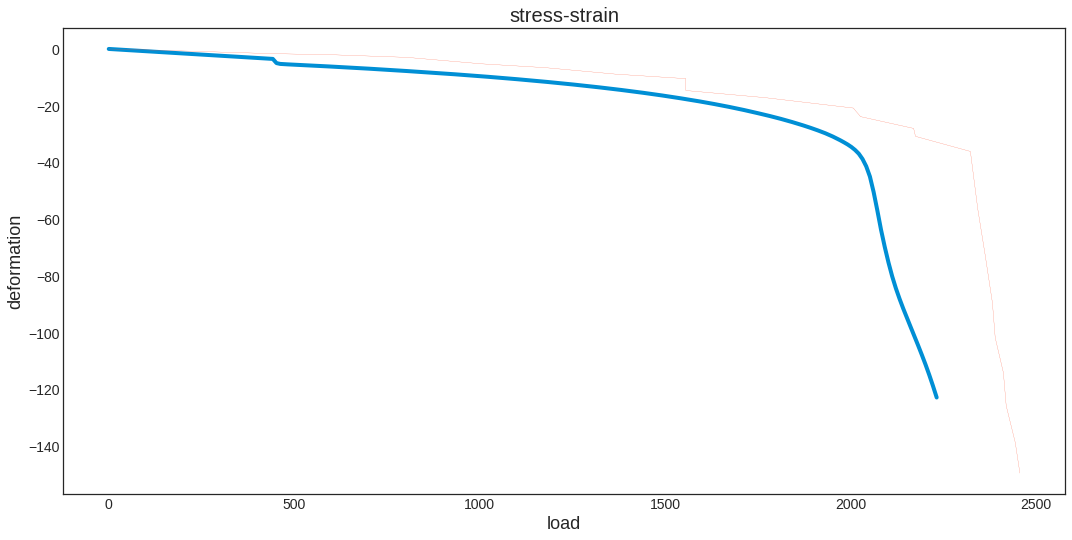

In [ ]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
time_step=2
output=pd.DataFrame()
predict_step=180
n_features=11
load_increment=10
strain=0
ks=df

x_trainn, y_trainn,xi=setup_data(ks,time_step)
ini1=x_trainn[0,:]
ini2=x_trainn[1,:]


#ini1=np.array([10,-0.02,1.2,1.2,43.6,70,16,50,12,16,20]) #initial [q,p,strain,strain_increment]
#ini2=np.array([20,-0.03,1.2,1.2,43.6,70,16,50,12,16,30])

'''ini1=np.array([2,50,0.01,strain_increment]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,50, 0.02,strain_increment])
#ini3=np.array([400,50,0.03,strain_increment])'''

ini=np.vstack((ini1,ini2))
#output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)
#output = output.append(({'load': ini[time_step-1,0],'deform':ini[time_step-1,1]}),ignore_index=True)
output = output.append(({'load': 0,'deform':0}),ignore_index=True)


#ini=np.vstack((ini1,ini))
ini=scaler_x.transform(ini)
ini=np.reshape(ini,(time_step,n_features))

load=ini2[10]
for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,n_features))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale=scaler_y.inverse_transform(predict)
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'load': load,'deform':pre_nonscale[0,0]}),ignore_index=True)
    load +=load_increment
    new_step=np.array([load-load_increment,pre_nonscale[0,0],
                       ini2[2],ini2[3],ini2[4], ini2[5],ini2[6],ini2[7],ini2[8],ini2[9],load],dtype=object)
    new_step1=np.reshape(new_step,(1,new_step.shape[0]))

    new_step=scaler_x.transform(new_step1)
    ini_t=np.vstack((ini,new_step[0,:]))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['load'],output['deform'])
plt.plot(ks1[0:24,0],ks1[0:24,1],linewidth=0.2)
plt.xlabel('load', fontsize=18)
plt.ylabel('deformation', fontsize=18)
plt.show()



In [ ]:
ks.iloc[0:50,:]

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay,load_n,deform_n
0,0.00,0.000,1.5,1.5,43.0,64,16,53,12,16,163.31,-1.656
1,163.31,-0.561,1.5,1.5,43.0,64,16,53,12,16,442.32,-2.081
2,442.32,-1.656,1.5,1.5,43.0,64,16,53,12,16,609.73,-2.964
3,609.73,-2.081,1.5,1.5,43.0,64,16,53,12,16,803.83,-5.243
4,803.83,-2.964,1.5,1.5,43.0,64,16,53,12,16,1005.24,-6.598
5,1005.24,-5.243,1.5,1.5,43.0,64,16,53,12,16,1177.52,-8.879
6,1177.52,-6.598,1.5,1.5,43.0,64,16,53,12,16,1366.80,-10.463
7,1366.80,-8.879,1.5,1.5,43.0,64,16,53,12,16,1556.06,-14.654
8,1556.06,-10.463,1.5,1.5,43.0,64,16,53,12,16,1556.15,-17.162
9,1556.15,-14.654,1.5,1.5,43.0,64,16,53,12,16,1769.70,-20.829


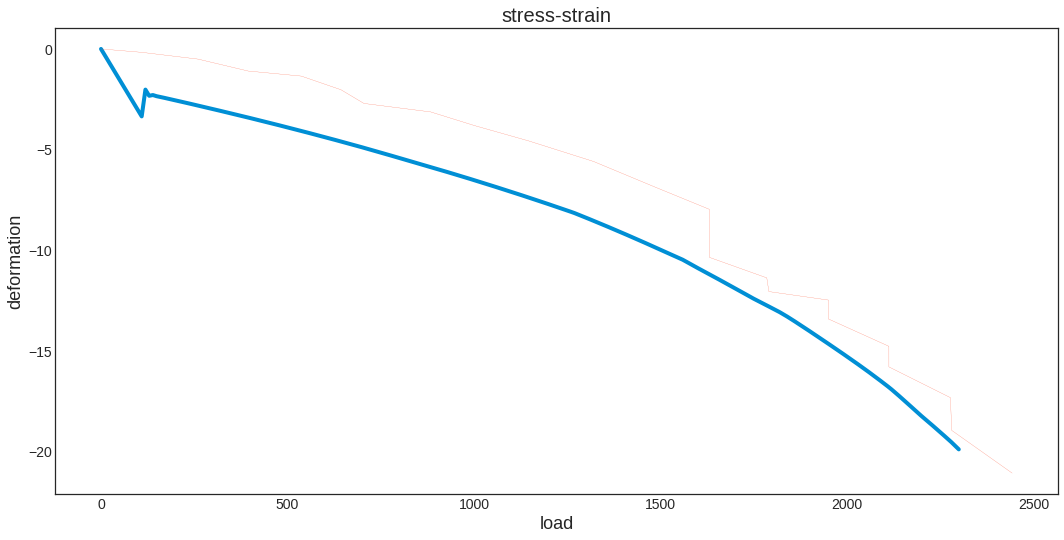

In [ ]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
time_step=2
output=pd.DataFrame()
predict_step=220
n_features=11
load_increment=10
strain=0
ks=df

x_trainn, y_trainn,xi=setup_data(ks,time_step)
ini1=x_trainn[25,:]
ini2=x_trainn[26,:]


#ini1=np.array([10,-0.02,1.2,1.2,43.6,70,16,50,12,16,20]) #initial [q,p,strain,strain_increment]
#ini2=np.array([20,-0.03,1.2,1.2,43.6,70,16,50,12,16,30])

'''ini1=np.array([2,50,0.01,strain_increment]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,50, 0.02,strain_increment])
#ini3=np.array([400,50,0.03,strain_increment])'''

ini=np.vstack((ini1,ini2))
#output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)
#output = output.append(({'load': ini[time_step-1,0],'deform':ini[time_step-1,1]}),ignore_index=True)
output = output.append(({'load': 0,'deform':0}),ignore_index=True)


#ini=np.vstack((ini1,ini))
ini=scaler_x.transform(ini)
ini=np.reshape(ini,(time_step,n_features))

load=ini2[10]
for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,n_features))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale=scaler_y.inverse_transform(predict)
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'load': load,'deform':pre_nonscale[0,0]}),ignore_index=True)
    load +=load_increment
    new_step=np.array([load-load_increment,pre_nonscale[0,0],
                       ini2[2],ini2[3],ini2[4], ini2[5],ini2[6],ini2[7],ini2[8],ini2[9],load],dtype=object)
    new_step1=np.reshape(new_step,(1,new_step.shape[0]))

    new_step=scaler_x.transform(new_step1)
    ini_t=np.vstack((ini,new_step[0,:]))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['load'],output['deform'])
plt.plot(ks1[26:49,0],ks1[26:49,1],linewidth=0.2)
plt.xlabel('load', fontsize=18)
plt.ylabel('deformation', fontsize=18)
plt.show()



In [ ]:
ini

array([[-0.01069571,  0.69168604,  1.        , -0.6       , -0.73333333,
         1.        ,  0.        ,  1.        ,  0.33333333, -0.6       ,
        -0.00677356],
       [-0.00677356,  0.68607361,  1.        , -0.6       , -0.73333333,
         1.        ,  0.        ,  1.        ,  0.33333333, -0.6       ,
        -0.00285141]])

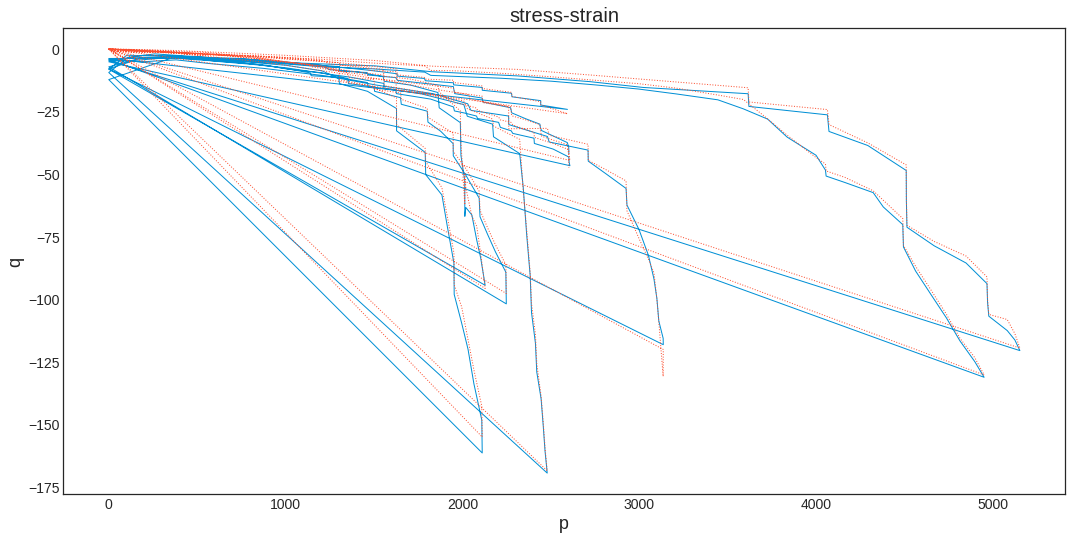

In [ ]:
predictn = model.predict(data_x)
predict = scaler_y.inverse_transform(predictn)
predictn = model.predict(data_x)
predict = scaler_y.inverse_transform(predictn)

data_x1=data_x[:,1,:]
data_x1_invert=scaler_x.inverse_transform(data_x1)

#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(data_x1_invert[:,10],predict[:,0],linewidth=1)
plt.plot(df['Load (ton)'],df['Settlement(mm.)'],linewidth=1,linestyle=':')
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()



In [ ]:
data_x1=data_x[:,1,:]
data_x1.shape

(252, 11)

In [ ]:
xi

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay,load_n
0,163.31,-0.561,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,442.32
1,442.32,-1.656,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,609.73
2,609.73,-2.081,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,803.83
3,803.83,-2.964,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1005.24
4,1005.24,-5.243,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1177.52
...,...,...,...,...,...,...,...,...,...,...,...
250,2440.41,-32.549,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2446.80
251,2446.80,-34.856,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2511.79
252,2511.79,-36.404,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2592.69
253,2592.69,-38.233,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2600.53


In [ ]:
new_step1

array([[20.0, -2.63811, 1.5, 43.6, 70.0, 16.0, 50.0, 12.0, 16.0, 30.0,
        30.0]], dtype=object)

In [ ]:
pre_nonscale

array([[665.27374]], dtype=float32)

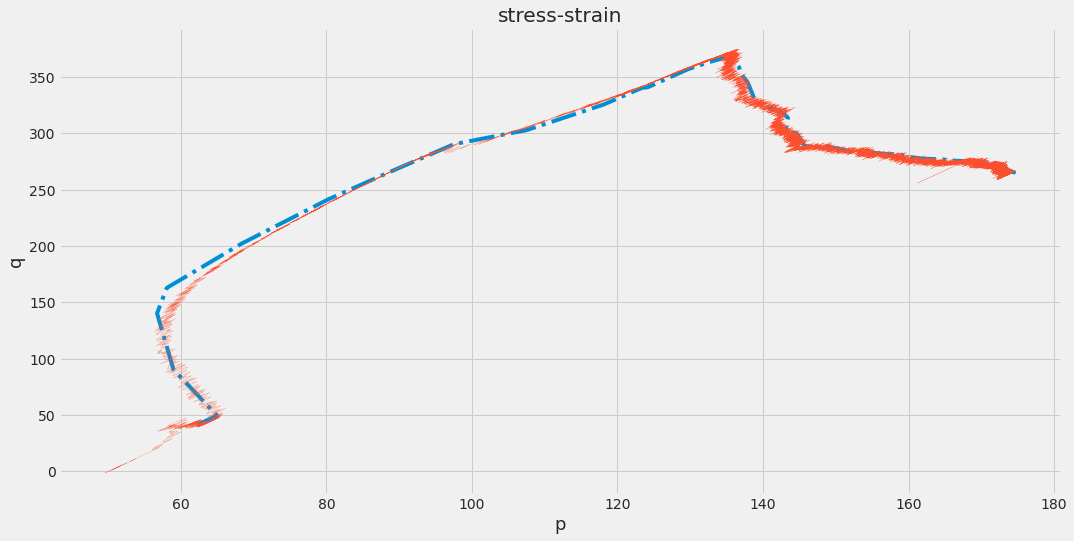

In [ ]:
ks=df.iloc[::100, :].reset_index(drop=True)
x_train1, y_train1=setup_data(ks,3)
x_train1=scaler_x.transform(x_train1)
data_x=time_step_data(x_train1,time_step)
test_split=0.01
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)



predictn = model.predict(data_x)
predict = scaler_y.inverse_transform(predictn)


#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(predict[:,1],predict[:,0],'-.')
plt.plot(df['p'],df['q'],linewidth=0.2)
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()




In [ ]:
data_x.shape

(63, 2, 3)

In [ ]:
data_x[:-3,2,1].shape

(59,)

In [ ]:
y_train1[:,0]

array([135.8934126, 171.4182734, 208.9126744, 242.4961576, 273.6607199,
       293.4040413, 317.0235455, 338.8201007, 340.7129019, 356.6501807,
       363.7635419, 369.9033047, 366.743071 , 366.6533437, 360.9120666,
       354.7596425, 347.595437 , 335.3391653, 328.007656 , 325.1653376,
       324.9672836, 320.6558696, 316.0828298, 303.7676063, 300.8993341,
       301.4995037, 292.8681933, 290.7151174, 284.85126  , 289.391682 ,
       289.0540334, 285.6796094, 281.677066 , 287.1290756, 279.108155 ,
       283.580335 , 282.3979458, 276.2230637, 276.9549451, 275.7380117,
       277.1259129, 271.947342 , 275.9250663, 273.0348765, 276.0615374,
       275.7289717, 273.4239344, 271.304603 , 274.8583473, 271.1077286,
       270.6810244, 272.5911935, 269.0798889, 266.9265251, 267.5721172,
       263.0067536, 267.251459 , 262.4729177, 264.9332541])

In [ ]:
pre_nonscale

array([[31.383224, 62.58911 ]], dtype=float32)

In [ ]:
strain

5.009999999999999